In [5]:
import os
os.chdir("C:/Users/neera/Downloads/dukedataclubfall2021")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("train.csv", sep = ',', header = 0, encoding = 'latin')

In [7]:
datax = pd.read_csv("train.csv", sep = ',', header = 0, encoding = 'latin')

In [8]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,1
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,1
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,1
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,1
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,1


In [9]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Date_Scheduled',
       'Appointment_Date', 'Age', 'Welfare', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_Reminder_Sent', 'Attended'],
      dtype='object')

In [10]:
data.shape

(104427, 13)

In [11]:
data['Attended'].value_counts()

1    83213
0    21214
Name: Attended, dtype: int64

In [12]:
from datetime import datetime

In [13]:
data[["Date_Scheduled", "Appointment_Date"]] = data[["Date_Scheduled", "Appointment_Date"]].astype(str)

for y in ["Appointment_Date", "Date_Scheduled"]:
    data[y] = data[y].apply(lambda x: x.split("T")[0])

In [14]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1


In [15]:
for y in ["Appointment_Date", "Date_Scheduled"]:
    data[y] = pd.to_datetime(data[y])
    data['Date_Scheduled_Day']=pd.DatetimeIndex(data["Date_Scheduled"]).day_name()
data['Appointment_Date_Day']=pd.DatetimeIndex(data["Appointment_Date"]).day_name()
data['Scheduled_Appointment_Duration']=data['Appointment_Date']-data['Date_Scheduled']

In [17]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,Friday,Friday,0 days
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,Friday,Friday,0 days
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,Friday,Friday,0 days
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,Friday,Friday,0 days
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,Friday,Friday,0 days


In [18]:
#### Data Quality Report

def dataQuality(data):
    d={}
    def numeric_quality(data):
        def q1(x):
            return x.quantile(0.25)
        def q3(x):
            return x.quantile(0.75)
        def q99(x):
            return x.quantile(0.99)
        def count(x):
            return x.count()
        def miss_per(x):
            return x.isnull().sum()/len(x)
        def unique(x):
            return len(x.unique())
        qr=dict()
        #Select only numeric data types
        data=data.select_dtypes(include=[np.number])
        for i in np.arange(0,len(data.columns),1):
            xi=data.agg({data.columns[i]:[count,unique,miss_per,np.min,np.max,np.mean,np.median,np.std,np.var,q1,q3,q99]})
            qr[data.columns[i]]=xi.reset_index(drop=True)[data.columns[i]]
            df1=pd.DataFrame(qr)
            #df1.index=xi.index
            df1.index=["Count","Unique","Miss_per","Min","Max","Mean","Median","Std","Var","Q1","Q3","q99"]
        return df1.T
    d['numeric']=numeric_quality(data)
    def cat_quality(data):
        def count(x):
            return x.count()
        def miss_per(x):
            return x.isnull().sum()/len(x)
        def unique(x):
            return len(x.unique())
        def freq_cat(x):
            return x.value_counts().sort_values(ascending=False).index[0]
        def freq_cat_per(x):
            return x.value_counts().sort_values(ascending=False)[0]/len(x)
        qr=dict()
        data=data.select_dtypes(include=[object])
        for i in np.arange(0,len(data.columns),1):
            xi=data.agg({data.columns[i]:[count,unique,miss_per,freq_cat,freq_cat_per]})
            qr[data.columns[i]]=xi.reset_index(drop=True)[data.columns[i]]
            df2=pd.DataFrame(qr)
            #df2.index=xi.index
            df2.index=["Count","Unique","Miss_per","Freq_Level","freq_cat_Per"]
        return df2.T
    d['categorical']=cat_quality(data)
    return d

In [19]:
dQreport = dataQuality(data)
dQreport

{'numeric':                                  Count  Unique Miss_per                Min  \
 PatientId                       104427    4324        0        2.26387e+07   
 AppointmentID                   104427  104427        0        5.03023e+06   
 Age                             104427     103        0                 -1   
 Welfare                         104427       2        0                  0   
 Hypertension                    104427       2        0                  0   
 Diabetes                        104427       2        0                  0   
 Alcoholism                      104427       2        0                  0   
 Handicap                        104427       5        0                  0   
 SMS_Reminder_Sent               104427       2        0                  0   
 Attended                        104427       2        0                  0   
 Scheduled_Appointment_Duration  104427     131        0  -6 days +00:00:00   
 
                                       

In [20]:
dQreport['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
PatientId,104427,4324,0,2.26387e+07,1e+15,1.51324e+14,3.49e+13,2.58064e+14,6.65971e+28,4.87e+12,9.57e+13,9.64e+14
AppointmentID,104427,104427,0,5.03023e+06,5.79048e+06,5.67296e+06,5.67856e+06,70593.4,4.98342e+09,5.63933e+06,5.72196e+06,5.78351e+06
Age,104427,103,0,-1,115,37.1077,37,23.0943,533.347,18,55,86
Welfare,104427,2,0,0,1,0.0981738,0,0.297551,0.0885366,0,0,1
Hypertension,104427,2,0,0,1,0.197315,0,0.397974,0.158383,0,0,1
Diabetes,104427,2,0,0,1,0.0718205,0,0.258192,0.066663,0,0,1
Alcoholism,104427,2,0,0,1,0.0305572,0,0.172116,0.0296238,0,0,1
Handicap,104427,5,0,0,4,0.0223793,0,0.161353,0.0260347,0,0,1
SMS_Reminder_Sent,104427,2,0,0,1,0.316269,0,0.465021,0.216245,0,1,1
Attended,104427,2,0,0,1,0.796853,1,0.402343,0.16188,1,1,1


In [21]:
dQreport['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
Gender,104427,2,0,F,0.649047
Date_Scheduled_Day,104427,6,0,Tuesday,0.23741
Appointment_Date_Day,104427,6,0,Tuesday,0.232354


In [22]:
import seaborn as sns

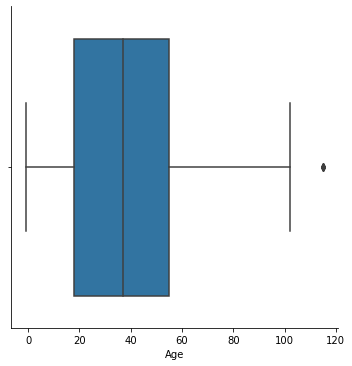

In [23]:
sns.catplot(x='Age', kind = 'box', data=data)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104427 entries, 0 to 104426
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   PatientId                       104427 non-null  float64        
 1   AppointmentID                   104427 non-null  int64          
 2   Gender                          104427 non-null  object         
 3   Date_Scheduled                  104427 non-null  datetime64[ns] 
 4   Appointment_Date                104427 non-null  datetime64[ns] 
 5   Age                             104427 non-null  int64          
 6   Welfare                         104427 non-null  int64          
 7   Hypertension                    104427 non-null  int64          
 8   Diabetes                        104427 non-null  int64          
 9   Alcoholism                      104427 non-null  int64          
 10  Handicap                        104427 non-n

In [25]:
#data[["Scheduled_Appointment_Duration"]] = data[["Scheduled_Appointment_Duration"]].astype(str)
#data['Scheduled_Appointment_Duration'] = data['Scheduled_Appointment_Duration'].apply(lambda x: x.split(" ",0))

In [26]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,Friday,Friday,0 days
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,Friday,Friday,0 days
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,Friday,Friday,0 days
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,Friday,Friday,0 days
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,Friday,Friday,0 days


In [27]:
data["Scheduled_Appointment_Duration"] = data["Scheduled_Appointment_Duration"].astype(str)
data["Scheduled_Appointment_Duration"] = data["Scheduled_Appointment_Duration"].apply(lambda x: x.split(" ")[0])
data["Scheduled_Appointment_Duration"] = data["Scheduled_Appointment_Duration"].astype(int)

In [28]:
data['Age'].value_counts()

 0      3344
 1      2153
 52     1654
 49     1568
 53     1564
        ... 
 98        6
 115       5
 100       4
 102       2
-1         1
Name: Age, Length: 103, dtype: int64

In [29]:
data.loc[data['Age']==-1]

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
95307,4.660000e+14,5775010,F,2016-06-06,2016-06-06,-1,0,0,0,0,0,0,1,Monday,Monday,0


In [30]:
data.drop(95307, inplace = True)

In [31]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,Friday,Friday,0
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,Friday,Friday,0
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,Friday,Friday,0
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,Friday,Friday,0
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,Friday,Friday,0


In [32]:
#data.drop('PatientId', axis=1, inplace=True)
#data.drop('AppointmentID', axis=1, inplace=True)
#data.drop('Date_Scheduled', axis=1, inplace=True)
#data.drop('Appointment_Date', axis=1, inplace=True)
#data.drop('Date_Scheduled_Day', axis=1, inplace=True)

In [33]:
data.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,Friday,Friday,0
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,Friday,Friday,0
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,Friday,Friday,0
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,Friday,Friday,0
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,Friday,Friday,0


In [34]:
data.drop(data[data["Scheduled_Appointment_Duration"] < 0].index, inplace = True)

data[data["Scheduled_Appointment_Duration"] < 0]

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration


In [35]:
datacopy_1 = data.copy()
datacopy_2 = data.copy()

In [41]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26821 sha256=1c9d357c5a42ad93228bae58613cf64943a2383006f77e45711e8e241c4a232d
  Stored in directory: c:\users\neera\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [37]:
data1 = data.copy()

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state = 42)

In [44]:
import pandasql as pdsql
rolling_sum  = pdsql.sqldf(" SELECT PatientId ,Appointment_Date, Attended,  SUM(Attended) OVER (PARTITION BY PatientId ORDER BY Appointment_Date asc ) AS running_total from data", globals() )
print(rolling_sum)


           PatientId            Appointment_Date  Attended  running_total
0       2.263866e+07  2016-05-03 00:00:00.000000         1              1
1       5.216894e+07  2016-05-16 00:00:00.000000         1              1
2       6.485121e+07  2016-05-13 00:00:00.000000         0              0
3       7.922850e+07  2016-05-30 00:00:00.000000         1              1
4       8.799645e+07  2016-05-13 00:00:00.000000         0              0
...              ...                         ...       ...            ...
104416  1.000000e+15  2016-05-25 00:00:00.000000         1             19
104417  1.000000e+15  2016-05-30 00:00:00.000000         1             20
104418  1.000000e+15  2016-06-03 00:00:00.000000         1             21
104419  1.000000e+15  2016-06-06 00:00:00.000000         1             22
104420  1.000000e+15  2016-06-07 00:00:00.000000         1             23

[104421 rows x 4 columns]


In [45]:
roll_sum = pd.DataFrame(rolling_sum)
roll_sum = pd.DataFrame(roll_sum['running_total'])
roll_sum.head()

,running_total
0,1
1,1
2,0
3,1
4,0


In [46]:
data_new = data.merge(roll_sum, how = 'inner', right_index = True, left_index =  True)
data_new.shape

(104415, 17)

In [47]:
data_new.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration,running_total
0,2.990000e+13,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,Friday,Friday,0,1
1,5.590000e+14,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,Friday,Friday,0,1
2,4.260000e+12,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,Friday,Friday,0,0
3,8.680000e+11,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,Friday,Friday,0,1
4,8.840000e+12,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,Friday,Friday,0,0


In [48]:
data_new.drop('PatientId', axis=1, inplace=True)
data_new.drop('AppointmentID', axis=1, inplace=True)
data_new.drop('Date_Scheduled', axis=1, inplace=True)
data_new.drop('Appointment_Date', axis=1, inplace=True)
data_new.drop('Date_Scheduled_Day', axis=1, inplace=True)

In [49]:
data_new.head()

,Gender,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Attended,Appointment_Date_Day,Scheduled_Appointment_Duration,running_total
0,F,62,0,1,0,0,0,0,1,Friday,0,1
1,M,56,0,0,0,0,0,0,1,Friday,0,1
2,F,62,0,0,0,0,0,0,1,Friday,0,0
3,F,8,0,0,0,0,0,0,1,Friday,0,1
4,F,56,0,1,1,0,0,0,1,Friday,0,0


In [50]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [52]:
x_Features = list(data_new.columns)
x_Features.remove('Attended')
x_Features

['Gender',
 'Age',
 'Welfare',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_Reminder_Sent',
 'Appointment_Date_Day',
 'Scheduled_Appointment_Duration',
 'running_total']

In [102]:
data1_encoded = pd.get_dummies(data_new[x_Features], drop_first = True)

In [103]:
data1_encoded.head()

,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration,running_total,Gender_M,Appointment_Date_Day_Monday,Appointment_Date_Day_Saturday,Appointment_Date_Day_Thursday,Appointment_Date_Day_Tuesday,Appointment_Date_Day_Wednesday
0,62,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing  import OrdinalEncoder,OneHotEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_classif 
from sklearn.cluster import KMeans 
from sklearn.metrics import adjusted_rand_score
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [61]:
def feature_importance(df,y):
    # YOUR CODE HERE
  ftest = SelectKBest(score_func= mutual_info_classif, k='all')
  ftest.fit(df,y)
  f_scores = pd.DataFrame(ftest.scores_)
  dfcolumns = pd.DataFrame(df.columns)
  f_scores = pd.concat([dfcolumns,f_scores],axis=1)
  f_scores.columns = ['Feature','Score']  
  f_scores = f_scores.sort_values(by='Score',ascending=False)
  return f_scores
  raise NotImplementedError()

In [104]:
Y = data_new.Attended
X = data1_encoded

In [105]:
scores = feature_importance(X,Y)

In [106]:
print(scores)

                           Feature     Score
7   Scheduled_Appointment_Duration  0.051661
6                SMS_Reminder_Sent  0.009901
0                              Age  0.002395
2                     Hypertension  0.002109
14  Appointment_Date_Day_Wednesday  0.001408
1                          Welfare  0.001360
10     Appointment_Date_Day_Monday  0.001295
9                         Gender_M  0.000947
4                       Alcoholism  0.000400
3                         Diabetes  0.000330
5                         Handicap  0.000000
8                    running_total  0.000000
11   Appointment_Date_Day_Saturday  0.000000
12   Appointment_Date_Day_Thursday  0.000000
13    Appointment_Date_Day_Tuesday  0.000000


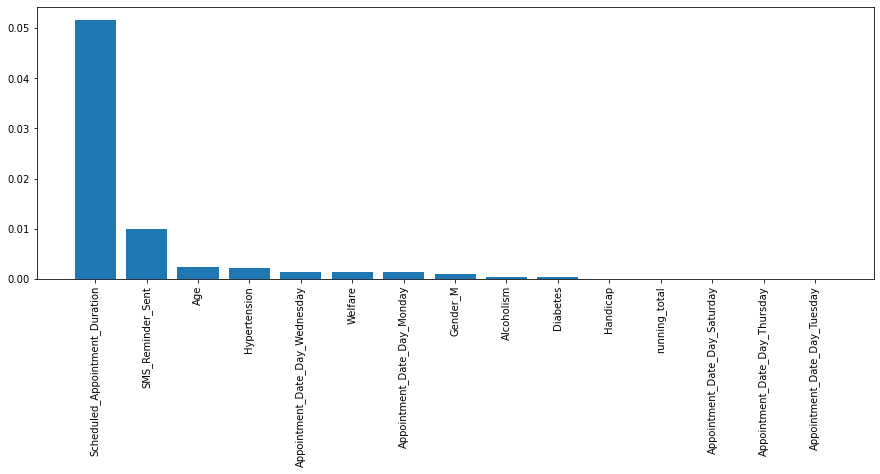

In [107]:
# Plot scores
plt.figure(figsize=(15,5))
plt.bar(x=scores['Feature'],height=scores['Score'])
plt.xticks(rotation=90)
plt.show()

In [74]:
X1.drop(columns = {'Appointment_Date_Day_Thursday','Alcoholism','Appointment_Date_Day_Saturday','Handicap', 'Hypertension','Diabetes'
                  ,'Appointment_Date_Day_Wednesday' }
                 , axis=1, inplace=True)
X1.head()

NameError: name 'X1' is not defined

In [110]:
X.head()
X.drop(columns = {'Appointment_Date_Day_Thursday','Appointment_Date_Day_Saturday','running_total', 
                  'Appointment_Date_Day_Tuesday' }
                 , axis=1, inplace=True)
X.head()

,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration,Gender_M,Appointment_Date_Day_Monday,Appointment_Date_Day_Wednesday
0,62,0,1,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1,0,0
2,62,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0,0,0


In [114]:
X.drop(columns = {'Appointment_Date_Day_Monday','Appointment_Date_Day_Wednesday' }
                 , axis=1, inplace=True)
X.head()

,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration,Gender_M
0,62,0,1,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0


In [128]:
X.head()

,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration,Gender_M
0,62,0,1,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0,0


In [76]:
X2 = X1 
X2.drop(columns = {'Alcoholism','Appointment_Date_Day_Saturday','Handicap', 'Hypertension','Diabetes'
                  ,'Appointment_Date_Day_Wednesday' }
                 , axis=1, inplace=True)
X1.head()

,Age,Welfare,SMS_Reminder_Sent,Scheduled_Appointment_Duration,running_total,Gender_M,Appointment_Date_Day_Monday
0,62,0,0,0,1,0,0
1,56,0,0,0,1,1,0
2,62,0,0,0,0,0,0
3,8,0,0,0,1,0,0
4,56,0,0,0,0,0,0


In [93]:
X3 = X2 
X3.drop(columns = {'running_total'}
                 , axis=1, inplace=True)
X3.head()

,Age,Welfare,SMS_Reminder_Sent,Scheduled_Appointment_Duration,Gender_M
0,62,0,0,0,0
1,56,0,0,0,1
2,62,0,0,0,0
3,8,0,0,0,0
4,56,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [116]:
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(Y_train))

Resampled dataset shape Counter({1: 66595, 0: 66595})


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,f1_score

model = LogisticRegression(penalty='l2',C= 1.0)
model.fit(X_train,Y_train)
test_preds = model.predict(X_test)
f1_scores = f1_score(Y_test, test_preds)
#acc_score = accuracy_score(y_test,test_preds)
print(f1_scores)

0.77499177360974


In [122]:
test = pd.read_csv("test.csv", sep = ',', header = 0, encoding = 'latin')
test.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent
0,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,0,0,0,0,0,1
1,2.578785e+10,5641781,F,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z,45,0,1,0,0,0,0
2,7.444632e+08,5539219,F,2016-04-01T14:27:30Z,2016-04-29T00:00:00Z,34,1,0,0,0,0,1
3,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,0
4,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,0,0,0,0,0,0


In [123]:
test[["Date_Scheduled", "Appointment_Date"]] = test[["Date_Scheduled", "Appointment_Date"]].astype(str)

for y in ["Appointment_Date", "Date_Scheduled"]:
    test[y] = test[y].apply(lambda x: x.split("T")[0])

In [124]:
test.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent
0,9.994839e+10,5620206,F,2016-04-26,2016-04-29,15,0,0,0,0,0,1
1,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,0,1,0,0,0,0
2,7.444632e+08,5539219,F,2016-04-01,2016-04-29,34,1,0,0,0,0,1
3,5.392419e+10,5641476,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0
4,1.925263e+10,5636933,F,2016-04-28,2016-04-29,30,0,0,0,0,0,0


In [125]:
for y in ["Appointment_Date", "Date_Scheduled"]:
    test[y] = pd.to_datetime(test[y])
    test['Date_Scheduled_Day']=pd.DatetimeIndex(test["Date_Scheduled"]).day_name()
test['Appointment_Date_Day']=pd.DatetimeIndex(test["Appointment_Date"]).day_name()
test['Scheduled_Appointment_Duration']=test['Appointment_Date']-test['Date_Scheduled']
test.head()

,PatientId,AppointmentID,Gender,Date_Scheduled,Appointment_Date,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Date_Scheduled_Day,Appointment_Date_Day,Scheduled_Appointment_Duration
0,9.994839e+10,5620206,F,2016-04-26,2016-04-29,15,0,0,0,0,0,1,Tuesday,Friday,3 days
1,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,0,1,0,0,0,0,Friday,Friday,0 days
2,7.444632e+08,5539219,F,2016-04-01,2016-04-29,34,1,0,0,0,0,1,Friday,Friday,28 days
3,5.392419e+10,5641476,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,Friday,Friday,0 days
4,1.925263e+10,5636933,F,2016-04-28,2016-04-29,30,0,0,0,0,0,0,Thursday,Friday,1 days


In [126]:
test["Scheduled_Appointment_Duration"] = test["Scheduled_Appointment_Duration"].astype(str)
test["Scheduled_Appointment_Duration"] = test["Scheduled_Appointment_Duration"].apply(lambda x: x.split(" ")[0])
test["Scheduled_Appointment_Duration"] = test["Scheduled_Appointment_Duration"].astype(int)

In [129]:
test.head()
test.drop(columns = {'PatientId','AppointmentID','Date_Scheduled','Appointment_Date','Date_Scheduled_Day','Appointment_Date_Day' }
                 , axis=1, inplace=True)
test.head()


,Gender,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration
0,F,15,0,0,0,0,0,1,3
1,F,45,0,1,0,0,0,0,0
2,F,34,1,0,0,0,0,1,28
3,M,0,0,0,0,0,0,0,0
4,F,30,0,0,0,0,0,0,1


In [130]:
test_encoded = pd.get_dummies(test, drop_first = True)
test_encoded.head()

,Age,Welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder_Sent,Scheduled_Appointment_Duration,Gender_M
0,15,0,0,0,0,0,1,3,0
1,45,0,1,0,0,0,0,0,0
2,34,1,0,0,0,0,1,28,0
3,0,0,0,0,0,0,0,0,1
4,30,0,0,0,0,0,0,1,0


In [131]:
final_pred = model.predict(test_encoded)
final_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [132]:
final_pd = pd.DataFrame(final_pred)
final_pd.shape

(6100, 1)

In [133]:
final_pd.to_csv("C:/Users/neera/Downloads/abc.csv")

In [53]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [54]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'Age',
 'Welfare',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_Reminder_Sent',
 'Scheduled_Appointment_Duration',
 'Gender_M',
 'Appointment_Date_Day_Monday',
 'Appointment_Date_Day_Saturday',
 'Appointment_Date_Day_Thursday',
 'Appointment_Date_Day_Tuesday',
 'Appointment_Date_Day_Wednesday']

In [95]:
y_pred_df = pd.DataFrame( { "actual": Y_test,"predicted_prob": logit_model.predict(sm.add_constant( X_test[significant_vars] ) )} )


SyntaxError: invalid syntax (<ipython-input-95-d9a0fd75b210>, line 1)

In [97]:
data2 = y_pred_df + data['AppointmentID']

KeyError: 'AppointmentID'

In [56]:
y_pred_df

,actual,predicted_prob
99053,1,0.517784
81359,1,0.501042
84571,1,0.649572
94490,1,0.365310
100538,0,0.716396
...,...,...
22663,1,0.662575
94118,1,0.598897
8550,1,0.730299
25252,1,0.690509


In [57]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
97358,1,0.587214,1
61188,1,0.389084,0
96343,1,0.784987,1
21794,1,0.565965,1
76677,1,0.801716,1
49100,1,0.536377,1
50779,1,0.846289,1
6807,1,0.662426,1
10399,1,0.630973,1
41676,0,0.531435,1


In [60]:
import sklearn.metrics as metrics

In [58]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

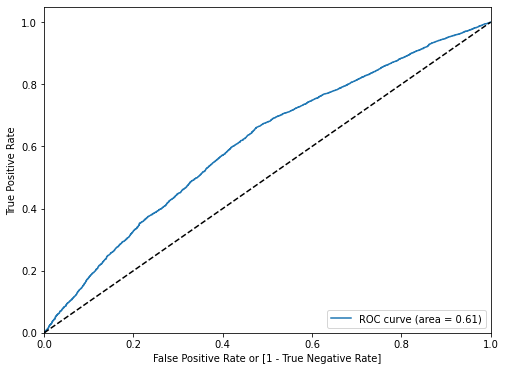

In [61]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [ ]:
import sklearn.metrics as metrics

In [62]:
y_pred_df = pd.DataFrame( { "actual": Y_test,"predicted_prob": logit_model.predict(X_test) } )
y_pred_df.head()

,actual,predicted_prob
99053,1,0.517784
81359,1,0.501042
84571,1,0.649572
94490,1,0.365310
100538,0,0.716396


In [63]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
97358,1,0.587214,1
61188,1,0.389084,0
96343,1,0.784987,1
21794,1,0.565965,1
76677,1,0.801716,1
49100,1,0.536377,1
50779,1,0.846289,1
6807,1,0.662426,1
10399,1,0.630973,1
41676,0,0.531435,1


In [66]:
def draw_cm( actual, predicted ):
    
    cm = metrics.confusion_matrix( y_pred_df.actual,y_pred_df.predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f',
                                   xticklabels = ["Show", "NO Show"] ,
                                  yticklabels = ["Show", "NO Show"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


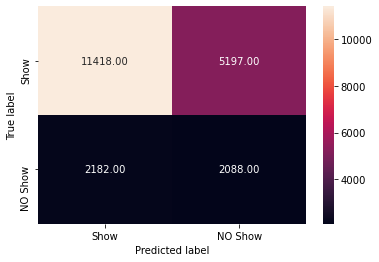

In [67]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [68]:
# Precision = TP/(TP + FP)
Precision = 11418/(11418+2182)
print(Precision)
Recall = 11418/(11418+5197)
print(Recall)
F1Score = (2*Precision*Recall)/(Precision+Recall)
print(F1Score)

0.8395588235294118
0.6872103520914836
0.7557835512162834


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [71]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
tree_predict = clf_tree.predict(X_test)
tree_predict

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [73]:
Y_test

99053     1
81359     1
84571     1
94490     1
100538    0
         ..
22663     1
94118     1
8550      1
25252     1
29066     1
Name: Attended, Length: 20885, dtype: int64

In [74]:
from sklearn.tree import plot_tree

[Text(418.5, 475.65000000000003, 'X[8] <= 0.5\ngini = 0.5\nsamples = 133194\nvalue = [66597, 66597]'),
 Text(209.25, 339.75, 'X[1] <= 28.5\ngini = 0.285\nsamples = 33635\nvalue = [5789, 27846]'),
 Text(104.625, 203.85000000000002, 'X[1] <= 6.5\ngini = 0.344\nsamples = 15171\nvalue = [3354, 11817]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.221\nsamples = 4885\nvalue = [617, 4268]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.391\nsamples = 10286\nvalue = [2737, 7549]'),
 Text(313.875, 203.85000000000002, 'X[14] <= 0.5\ngini = 0.229\nsamples = 18464\nvalue = [2435, 16029]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.243\nsamples = 14728\nvalue = [2082, 12646]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.171\nsamples = 3736\nvalue = [353, 3383]'),
 Text(627.75, 339.75, 'X[3] <= 0.5\ngini = 0.475\nsamples = 99559\nvalue = [60808, 38751]'),
 Text(523.125, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.462\nsamples = 83073\nvalue = [53022, 30051]'),
 Text(470.8125, 67.94999999999999,

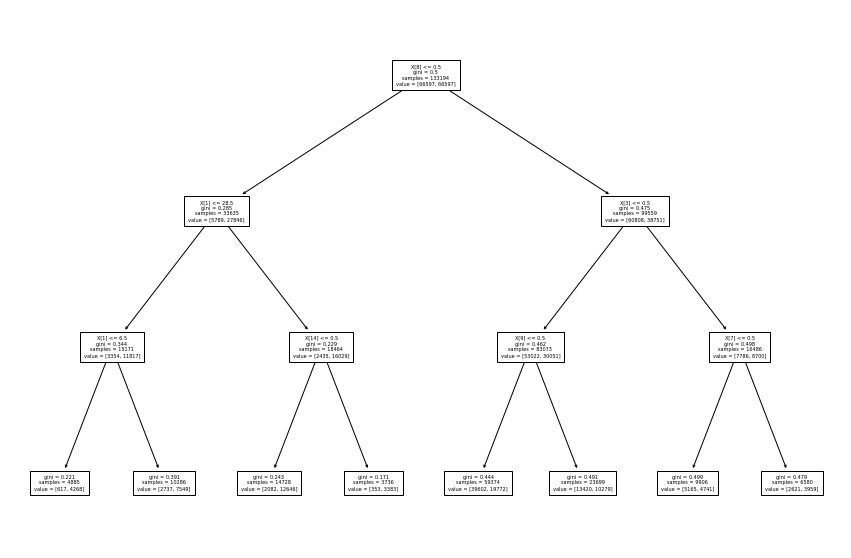

In [75]:
plt.figure(figsize=(15,10))

plot_tree(clf_tree, fontsize = 5)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score(Y_test, tree_predict)

0.6645978528755301

In [78]:
clf_tree_opt = DecisionTreeClassifier()

In [79]:
tune_param = [{'criterion' : ['gini','entropy'], 'max_depth' : range(2,5)}]

In [80]:
clf_opt = GridSearchCV(clf_tree_opt, tune_param, cv=5, scoring = 'roc_auc')

In [81]:
clf_opt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 5)}],
             scoring='roc_auc')

In [82]:
clf_opt.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [83]:
clf_opt.best_score_

0.7210279987280341

In [84]:
clf_tree_final = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

In [85]:
clf_tree_final.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [86]:
tree_predict_final = clf_tree_final.predict(X_test)
tree_predict_final

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [87]:
Y_test

99053     1
81359     1
84571     1
94490     1
100538    0
         ..
22663     1
94118     1
8550      1
25252     1
29066     1
Name: Attended, Length: 20885, dtype: int64

[Text(418.5, 475.65000000000003, 'X[8] <= 0.5\ngini = 0.5\nsamples = 133194\nvalue = [66597, 66597]'),
 Text(209.25, 339.75, 'X[1] <= 28.5\ngini = 0.285\nsamples = 33635\nvalue = [5789, 27846]'),
 Text(104.625, 203.85000000000002, 'X[1] <= 6.5\ngini = 0.344\nsamples = 15171\nvalue = [3354, 11817]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.221\nsamples = 4885\nvalue = [617, 4268]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.391\nsamples = 10286\nvalue = [2737, 7549]'),
 Text(313.875, 203.85000000000002, 'X[14] <= 0.5\ngini = 0.229\nsamples = 18464\nvalue = [2435, 16029]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.243\nsamples = 14728\nvalue = [2082, 12646]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.171\nsamples = 3736\nvalue = [353, 3383]'),
 Text(627.75, 339.75, 'X[3] <= 0.5\ngini = 0.475\nsamples = 99559\nvalue = [60808, 38751]'),
 Text(523.125, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.462\nsamples = 83073\nvalue = [53022, 30051]'),
 Text(470.8125, 67.94999999999999,

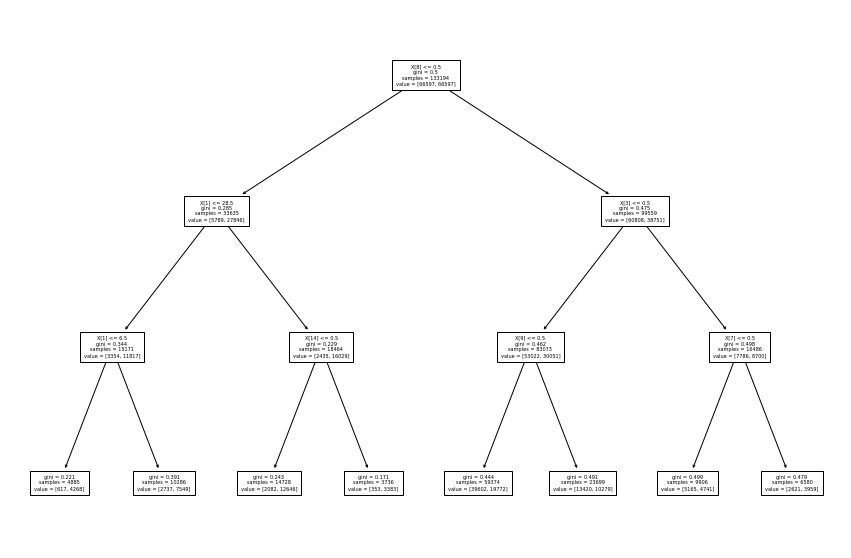

In [88]:
plt.figure(figsize=(15,10))

plot_tree(clf_tree, fontsize = 5)

In [89]:
roc_auc_score(Y_test, tree_predict_final)

0.6615622363753866

In [90]:
y_pred_dfd = pd.DataFrame( { "actual": Y_test,"predicted": tree_predict_final } )
y_pred_dfd.head()

,actual,predicted
99053,1,1
81359,1,0
84571,1,1
94490,1,0
100538,0,0


In [93]:
def draw_cm( actual, predicted ):
    
    cm = metrics.confusion_matrix( actual,predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f',
                                   xticklabels = ["Show", "NO Show"] ,
                                  yticklabels = ["Show", "NO Show"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


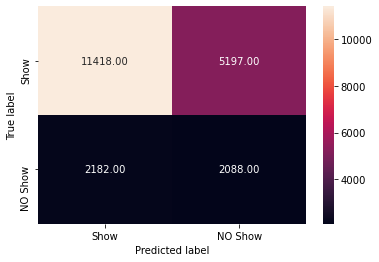

In [94]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [ ]:
Precision = 24708/(24708+6302)
print(Precision)
Recall = 24708/(24708+219)
print(Recall)
F1Score = (2*Precision*Recall)/(Precision+Recall)
print(F1Score)